In [3]:
import pandas as pd
import numpy as np 
import math
import nasdaqdatalink as nas
from sklearn import preprocessing, model_selection, svm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [5]:
df = nas.get('WIKI/GOOGL')                                                                                                     

LimitExceededError: (Status 429) (Nasdaq Data Link Error QELx01) You have exceeded the anonymous user limit of 50 calls per day. To make more calls today, please register for a free Nasdaq Data Link account and then include your API key with your requests.

In [75]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = ((df['Adj. High'] - df['Adj. Low']) / df['Adj. Low']) * 100                    
df['PCT_Change'] = ((df['Adj. Close'] - df['Adj. Open']) / df['Adj. Open']) * 100
df = df[['Adj. Close', 'PCT_Change', 'HL_PCT', 'Adj. Volume']]
df

,Adj. Close,PCT_Change,HL_PCT,Adj. Volume
Date,,,,
2004-08-19,50.322842,0.324968,8.441017,44659000.0
2004-08-20,54.322689,7.227007,8.537313,22834300.0
2004-08-23,54.869377,-1.227880,4.062357,18256100.0
2004-08-24,52.597363,-5.726357,7.753210,15247300.0
2004-08-25,53.164113,1.183658,3.966115,9188600.0
...,...,...,...,...
2018-03-21,1094.000000,0.130884,1.976619,1990515.0
2018-03-22,1053.150000,-2.487014,3.265882,3418154.0
2018-03-23,1026.550000,-2.360729,4.089299,2413517.0


In [76]:
forecast_cols = 'Adj. Close'
df.fillna(-99999, inplace = True)
forecast_out = int(math.ceil(0.01 * len(df)))
df['label'] = df[forecast_cols].shift(-forecast_out)
df.tail()                      

,Adj. Close,PCT_Change,HL_PCT,Adj. Volume,label
Date,,,,,
2018-03-21,1094.00,0.130884,1.976619,1990515.0,NaN
2018-03-22,1053.15,-2.487014,3.265882,3418154.0,NaN
2018-03-23,1026.55,-2.360729,4.089299,2413517.0,NaN
2018-03-26,1054.09,0.332191,4.818025,3272409.0,NaN
2018-03-27,1006.94,-5.353887,6.707965,2940957.0,NaN


In [4]:
X = np.array(df.drop(['label'], axis = 1))
Y = np.array(df['label'])
X = X[:-forecast_out]                    
Y = Y[:-forecast_out]
X_lately = X[-forecast_out: ]                                                                                  
X_train, X_test, Y_train, Y_test = model_selection.train_test_split(X, Y, test_size = 0.2)
clf = LinearRegression()
clf.fit(X_train, Y_train)
accuracy = clf.score(X_test, Y_test)
predictions = clf.predict(X_lately)
print(accuracy)                     

NameError: name 'df' is not defined

In [78]:
import datetime
from matplotlib import style
style.use('ggplot')

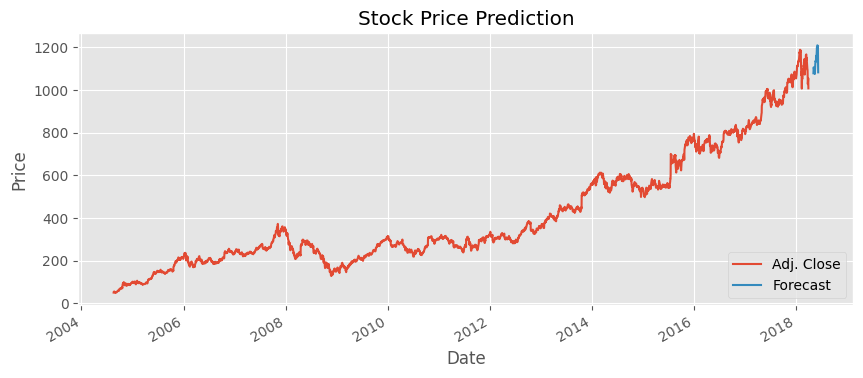

In [81]:
df['Forecast'] = np.nan                                                                                
  
last_date = df.iloc[-1].name
last_unix = pd.to_datetime(last_date)
one_day = 86400
next_unix = last_unix + pd.DateOffset(days=1)


for i in predictions:
    next_date = next_unix
    next_unix += pd.DateOffset(days=1)
    df.loc[next_date] = [np.nan for _ in range(len(df.columns) - 1 )] + [i]
    
plt.figure(figsize=(10, 4))
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price Prediction')
plt.show()

In [83]:
                                        
df.head()
  

,Adj. Close,PCT_Change,HL_PCT,Adj. Volume,label,Forecast
Date,,,,,,
2004-08-19,50.322842,0.324968,8.441017,44659000.0,69.078238,NaN
2004-08-20,54.322689,7.227007,8.537313,22834300.0,67.839414,NaN
2004-08-23,54.869377,-1.227880,4.062357,18256100.0,68.912727,NaN
2004-08-24,52.597363,-5.726357,7.753210,15247300.0,70.668146,NaN
2004-08-25,53.164113,1.183658,3.966115,9188600.0,71.219849,NaN


In [84]:
df.tail()

,Adj. Close,PCT_Change,HL_PCT,Adj. Volume,label,Forecast
Date,,,,,,
2018-06-01,NaN,NaN,NaN,NaN,NaN,1198.760252
2018-06-02,NaN,NaN,NaN,NaN,NaN,1203.561663
2018-06-03,NaN,NaN,NaN,NaN,NaN,1202.462417
2018-06-04,NaN,NaN,NaN,NaN,NaN,1138.075663
2018-06-05,NaN,NaN,NaN,NaN,NaN,1081.912054
